# 1) Load data from the text file

In [1]:
import numpy as np

In [2]:
## bydefault the delimiter is  " "
## it load data from the text file
data = np.loadtxt("data.csv" , delimiter = ",")

In [3]:
print(data.shape)
x = data[: , 0].reshape(-1, 1)  ## we need a 2-D array here (features always represent in form of 2-D array)
y = data[: , 1]
x.shape

(100, 2)


(100, 1)

# 2) Divide data into training and testing data

In [4]:
from sklearn import model_selection
x_train , x_test , y_train , y_test = model_selection.train_test_split(x , y)
# print(x_train.dtype)
type(x_train)
type(x_test)

numpy.ndarray

# 3) train the training data

In [5]:
from sklearn.linear_model import LinearRegression
algo1 = LinearRegression()
algo1.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print("slope (m) :" , algo1.coef_)
print("intercept (c) :" , algo1.intercept_)

slope (m) : [1.32125654]
intercept (c) : 8.087974612936677


# 4) plot training dataset

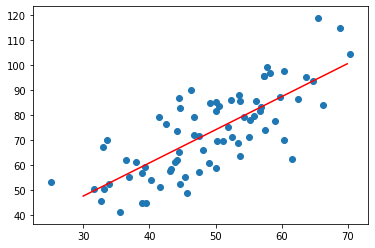

In [8]:
import matplotlib.pyplot as plt
m = algo1.coef_[0]
c = algo1.intercept_

x_line = np.arange(30 , 70 , 0.1)
y_line = m * x_line + c
plt.plot(x_line , y_line , "r") ## testing result

train_1d = x_train.reshape(75)
plt.scatter(x_train , y_train)
plt.show()


# 5) plot testing dataset

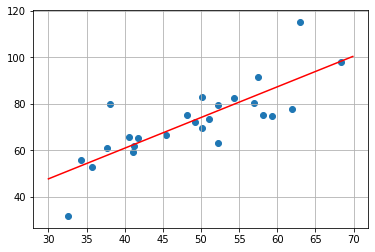

In [9]:
import matplotlib.pyplot as plt
m = algo1.coef_[0]
c = algo1.intercept_

x_line = np.arange(30 , 70 , 0.1)
y_line = m * x_line + c
plt.plot(x_line , y_line , "r")

train_1d = x_test.reshape(25)
plt.scatter(x_test , y_test)
plt.grid()
plt.show()
### kissi X_test ke liye uska actual answer y_test hoga but according toour algorithm
### we will predict our output according to the straight line

# 6) coefficient of Determination

In [10]:
train_res = algo1.score(x_train , y_train)
test_res = algo1.score(x_test , y_test)

train_res , test_res

(0.5852857291598988, 0.6438611905121079)

# 7) coding linear regression

In [11]:
def fit(x_train , y_train):
    m = (x_train * y_train).mean() - x_train.mean() * y_train.mean()
    m //= (x_train ** 2).mean() - x_train.mean() ** 2
    c = y_train.mean() - m * x_train.mean()
    return m , c

def predict(x , m ,c):
    return x * m + c

def score(y_truth , y_pred):
    u = ((y_truth - y_pred) ** 2 ).sum()
    v = ((y_truth - y_truth.mean()) ** 2 ).sum()
    return 1 - u / v

def cost(x , y , m , c):
#     return ((y - m*x - c) ** 2).mean()  ## use when training data are so large and value of cost is very large
    return ((y - m*x - c) ** 2).sum()
    


x = data[: , 0]
y = data[: , 1]
from sklearn import model_selection
x_train , x_test , y_train , y_test = model_selection.train_test_split(x , y , test_size = 0.3)
# type(x_train)
# type(x_test)
# x_train.shape

m , c = fit(x_train , y_train)
print("m , c :" , m , c)

# on test data
y_pred = predict(x_test , m , c)
print("Test score :" , score(y_test , y_pred))
print("cost on trianing data :" , cost(x_test , y_test , m , c))
print()

# on training data
y_train_pred = predict(x_train , m , c)
print("Train score" , score(y_train , y_train_pred))
print("cost on training data :" , cost(x_train , y_train , m , c ))


m , c : 1.0 23.165241823421347
Test score : 0.4814846031080374
cost on trianing data : 4853.324739382659

Train score 0.601591811681885
cost on training data : 7187.479954744948
